In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
 
# tutaj ładujemy dane do obiektu data frame z biblioteki pandas
# plik CSV nie posiada nagłówka dlatego header=None
# kolumnom nadajemy nazwy korzystając z parametru names
# W skryptach ML dane trzeba skądś pobrać, stad znajomość polecenia 
# read_csv jest super przydatna
 
iris = pd.read_csv(r"iris.dat",
                   header = None, 
                   names = ['petal length', 'petal width', 
                            'sepal length', 'sepal width', 'species'])
iris.head()

 
# można sprawdzic rozmiar wczytanego zbioru
# jeśli obiekt ma więcej wymiarów, to można niezależnie sprawdzać każdy z nich
# W skryptach ML, często trzeba zainicjować rozmiary innych obiektów zależnie od
# rozmiaru danych wejściowych. Robi się to korzystając własnie z właściwości shape
iris.shape
#iris.shape[0]
#iris.shape[1]

(150, 5)

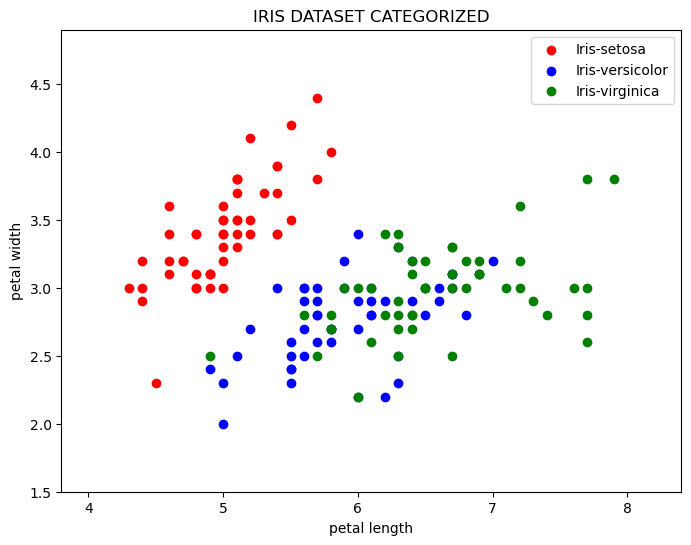

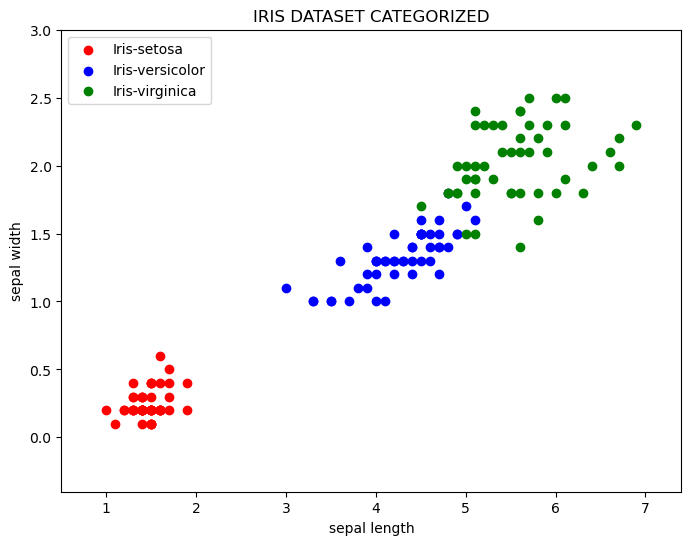

In [9]:
# dalej przygotowujemy wykres - tutaj wyznaczenie wartości min i max dla 
# 2 wybranych kolumn z rozmiarami kwiatów. Kiedy chcesz się odwołać do całej kolumny w data frame,
# to w nawiasie kwadratowym podajesz nazwę tej kolumny
x_min, x_max = iris['petal length'].min() - .5, iris['petal length'].max() + .5
y_min, y_max = iris['petal width'].min() - .5, iris['petal width'].max() + .5
 
# każdy gatunek ma być wyświetlony w innym kolorze - definiujemy słownik
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
 
# tworzymy obiekt odpowiedzialny za rysowany wykres i jego współrzędne
# instrukcje odtąd aż do plt.show() uruchom zaznaczając cały ten blok kodu
fig, ax = plt.subplots(figsize=(8, 6))
 
# grupujemy dane ze względu na gatunek i rysujemy dane. Korzystamy tu z metody groupby obiektu data frame
# funkcja zwraca klucz identyfikujący nazwę grupy (tutaj jest to nazwa gatunku kwiatu) oraz
# próbki wchodzące w skład tej grupy. To pozwala rysować każdą grupę w innym kolorze
for key, group in iris.groupby(by='species'):
    plt.scatter(group['petal length'], group['petal width'], 
                c=colors[key], label=key)
 
# dodajemy legendę i opis osi
ax.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
ax.set_title("IRIS DATASET CATEGORIZED")
 
plt.show()
 
# teraz podobny wykres można sporządzić dla sepal
# pamiętaj o uruchomieniu mając zaznaczony blok kodu odtąd aż do plt.show()
# kroki są takie same jak w poprzednim przykładzie
x_min, x_max = iris['sepal length'].min() - .5, iris['sepal length'].max() + .5
y_min, y_max = iris['sepal width'].min() - .5, iris['sepal width'].max() + .5
 
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
 
fig, ax = plt.subplots(figsize=(8, 6))
 
for key, group in iris.groupby(by='species'):
    # funkcja scatter przyjmuje argumenty - współrzędne X punktów, współrzędne Y punktów,
    # kolor i nazwę rysowanej grupy
    plt.scatter(group['sepal length'], group['sepal width'], 
                c=colors[key], label=key)
 
ax.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
ax.set_title("IRIS DATASET CATEGORIZED")
 
plt.show()

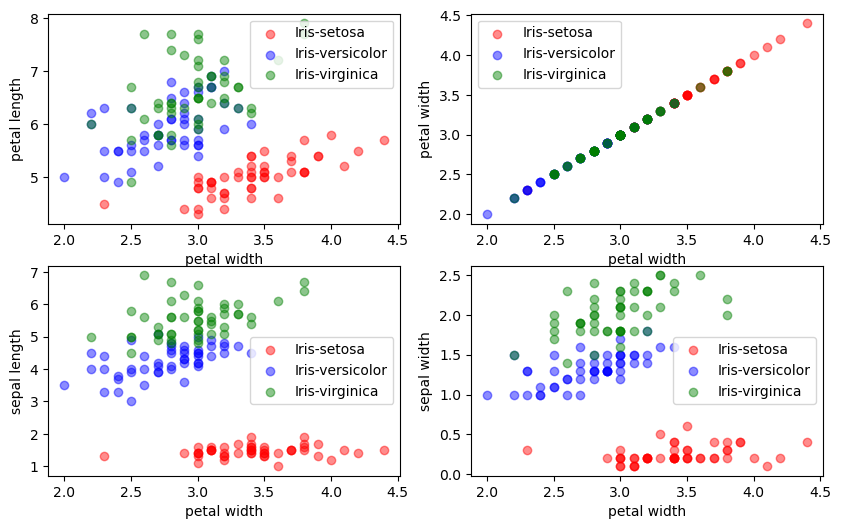

In [10]:
# utwórz wykres składający się z 4 małych wykresów
fig, ax = plt.subplots(2,2,figsize=(10, 6))
 
# aktualnie rysowanie odbędzie się w określonym pod-wykresie
plt_position = 1
 
# obrazujemy zależność miedzy tą zmienną, a pozostałymi cechami próbek
feature_x= 'petal width'
 
# dla każdej cechy opisującej kwiaty
for feature_y in iris.columns[:4]:
 
    # wybierz kolejny pod wykres
    plt.subplot(2, 2, plt_position) 
 
    # i rysuj osobne wykresy dla każdego gatunku (te 3 rysowane tu wykresy
    # nakładają sie na siebie, co pozwala automatycznie generować legendę)
    for species, color in colors.items():
        # podczas rysowanie należy odfiltrować tylko kwiaty jednego gatunku
        # zobacz jak filtrować dane. Służy do tego funkcja loc wywoływana dla data frame
        # wyrażenie w nawiasie kwadratowym ma zwracać True/False. Zwrócone będą wiersze,
        # gdzie wyrażenie ma wartość True. Po przecinku znajduje się nazwa kolumny, która ma być zwrócona
        plt.scatter(iris.loc[iris['species']==species, feature_x],
                    iris.loc[iris['species']==species, feature_y],
                    label=species,
                    alpha = 0.45, # transparency
                    color=color)
 
    # opisujemy wykres
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt_position += 1
 
plt.show()

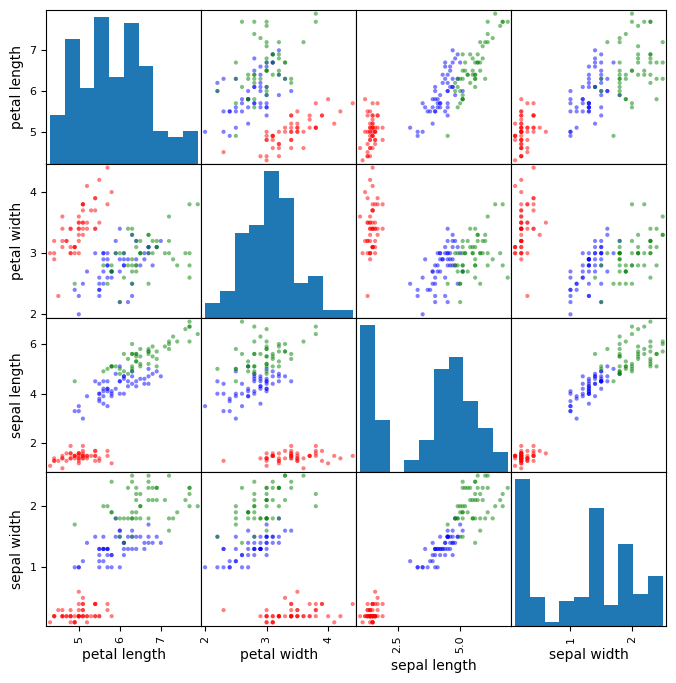

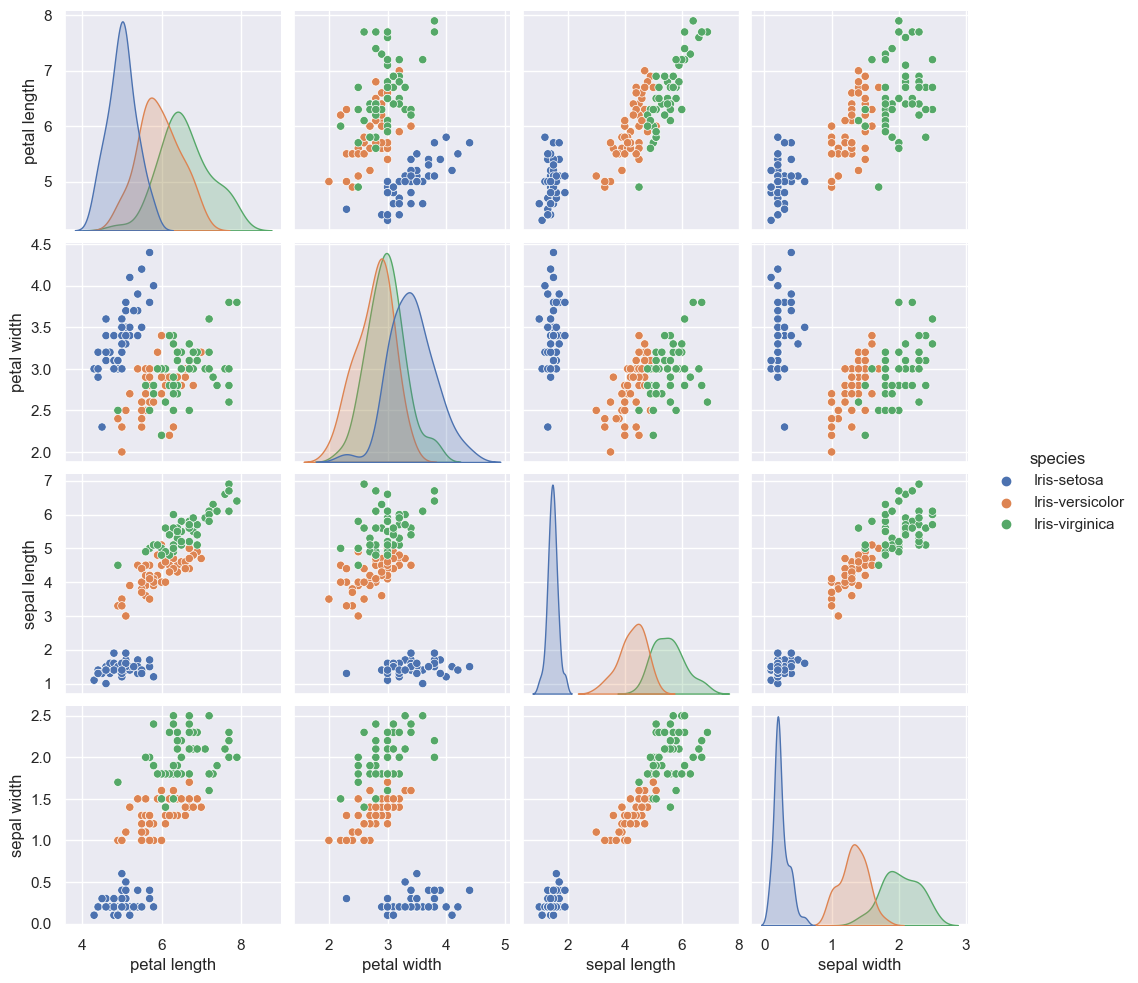

In [11]:
# Zamiast analizować każdą parę niezależnie można generować tzw. scatter matrix,
# czyli gotową macierz z wykresami dla każdej pary właściwości
# tutaj wykorzystujemy funkcję scatter_matrix zaimplementowaną w pandas...
# Do wyznaczenia koloru skorzystaliśmy z funkcji apply. Pozwala ona wywołać prostą funkcję na rzecz
# każdego wiersza z data frame lub serii danych
pd.plotting.scatter_matrix(iris, figsize=(8, 8), 
                           color = iris['species'].apply(lambda x: colors[x]));
plt.show()
 
# ... a tutaj podobny wykres generowany przez funkcję pairplot z modułu seaborn
import seaborn as sns
sns.set()
sns.pairplot(iris, hue="species")

In [21]:
from sklearn.linear_model import LinearRegression

# split data to features X and labels y
X = iris.iloc[:,:4]
y = iris.loc[:,'species']

# dictionary to allow colors points on diagram
categories = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
y = y.apply(lambda x: categories[x])


X.head()
y.head()


lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)


iris_1 = [5.0,3.5,1.4,0.2]
iris_2 = [6.4,3.0,4.5,1.0]
iris_3 = [6.0,3.0,5.0,2.0]
other = [1.0,2.0,3.0,4.0]

flowers = [iris_1,iris_2,iris_3,other]

species_predict = lr.predict(flowers)
print(species_predict)

for f,s in zip(flowers,species_predict):
    if round(s) == 1:
        print(f"Flower {f} is Iris-setosa")
    elif round(s) == 2:
        print(f"Flower {f} is Iris-versicolor")
    elif round(s) == 3:
        print(f"Flower {f} is Iris-virginica")
    else:
        print(f"Flower {f} is other")


[0.92831587 1.98841763 2.75570903 4.11444226]
Flower [5.0, 3.5, 1.4, 0.2] is Iris-setosa
Flower [6.4, 3.0, 4.5, 1.0] is Iris-versicolor
Flower [6.0, 3.0, 5.0, 2.0] is Iris-virginica
Flower [1.0, 2.0, 3.0, 4.0] is other


/Users/aleksandramolenda/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
